In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
tweet_sentiment = pd.read_csv('Downloads/Data/tweet_sentiment.csv')
tweet_sentiment.head()

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


In [5]:
tweet_sentiment.tail()

,tweet,sentiment
995,It’s cloudy outside.,neutral
996,Great job by the team!,positive
997,I'm so happy about the news!,positive
998,It ruined my whole day.,negative
999,I'm sick of this happening.,negative


In [23]:
tweet_sentiment.shape

(1000, 2)

In [7]:
tweet_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [15]:
tweet_sentiment.duplicated().sum()

983

In [17]:
tweet_sentiment.duplicated()

0      False
1      False
2      False
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

In [21]:
tweet_sentiment.isnull().sum()

tweet        0
sentiment    0
dtype: int64

## DataVizualization

In [36]:
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

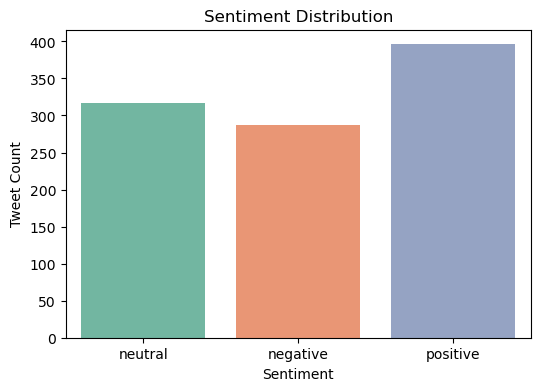

In [40]:
# Basic setup

stop_words = set(stopwords.words('english'))

# 1. Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=tweet_sentiment, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

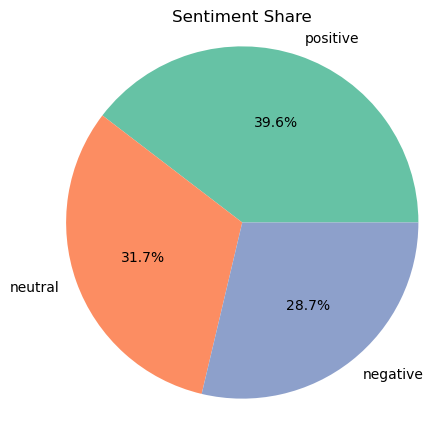

In [42]:
# 2. Pie chart of sentiment distribution
sentiment_counts = tweet_sentiment['sentiment'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Sentiment Share')
plt.axis('equal')
plt.show()

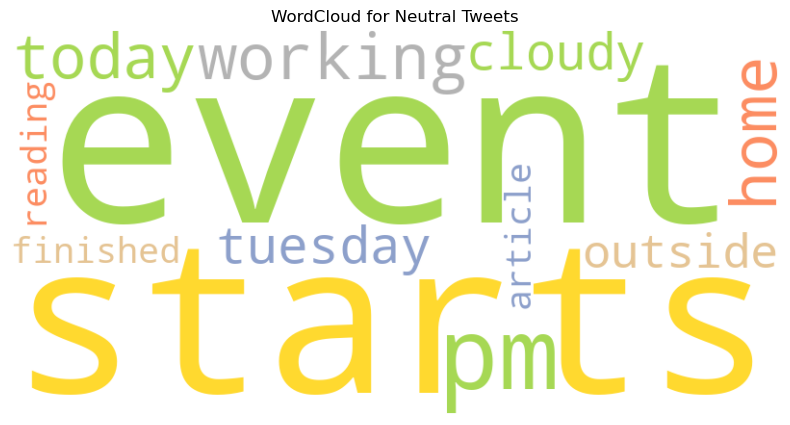

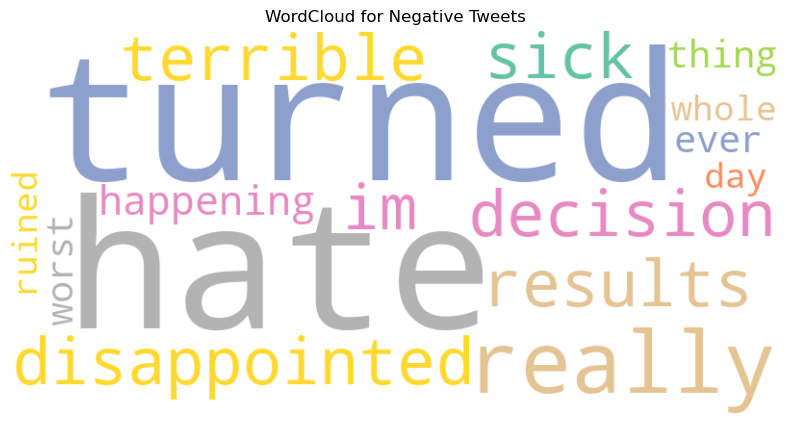

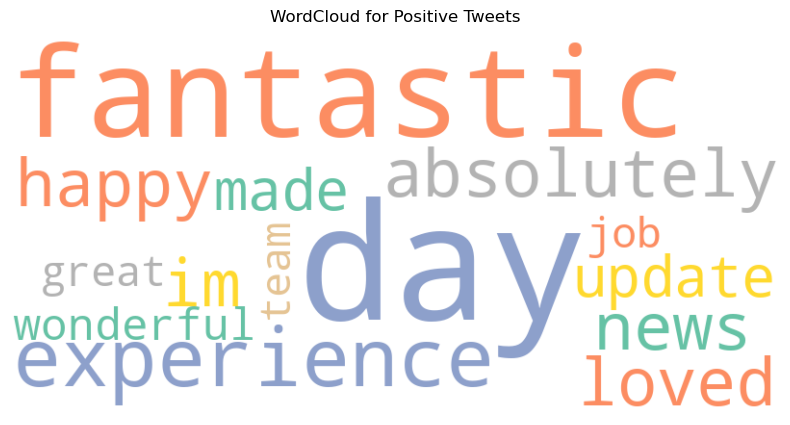

In [44]:
# 3. WordClouds for each sentiment
def clean_text(text):
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return [word for word in words if word not in stop_words and word.isalpha()]

for sentiment in tweet_sentiment['sentiment'].unique():
    all_words = tweet_sentiment[tweet_sentiment['sentiment'] == sentiment]['tweet'].dropna().apply(clean_text).sum()
    word_freq = Counter(all_words)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment.capitalize()} Tweets')
    plt.show()

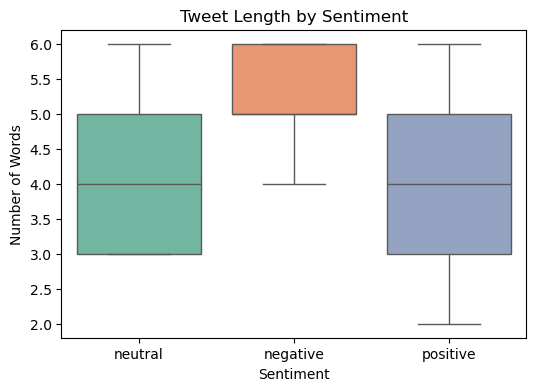

In [48]:
# 4. Average tweet length per sentiment
tweet_sentiment['tweet_length'] = tweet_sentiment['tweet'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6, 4))
sns.boxplot(data=tweet_sentiment, x='sentiment', y='tweet_length', palette='Set2')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

## Modeling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Drop NaNs if any
tweet_sentiment.dropna(subset=['tweet', 'sentiment'], inplace=True)

# Encode target labels
label_encoder = LabelEncoder()
tweet_sentiment['label'] = label_encoder.fit_transform(tweet_sentiment['sentiment'])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(tweet_sentiment['tweet'])
y = tweet_sentiment['label']

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Models to compare
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear)': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

Naive Bayes Accuracy: 100.00%


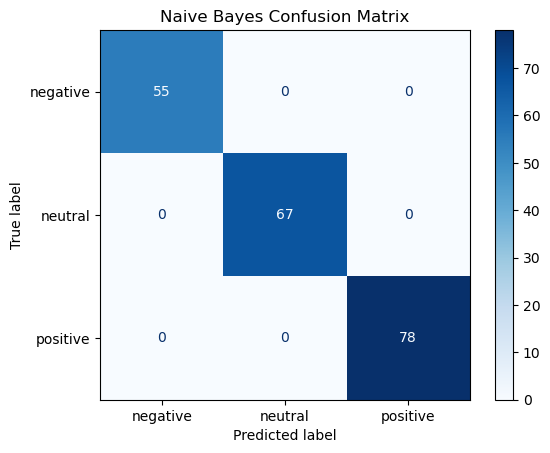

Logistic Regression Accuracy: 100.00%


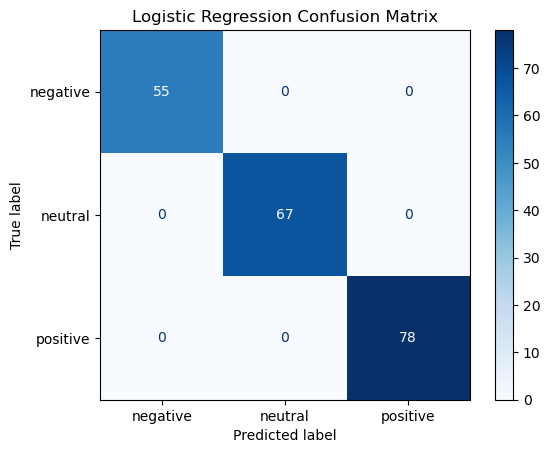

SVM (Linear) Accuracy: 100.00%


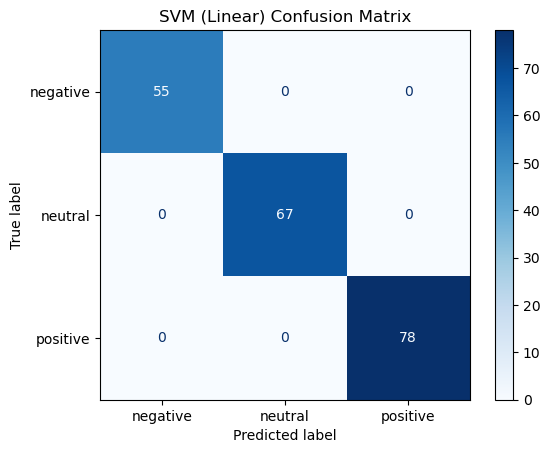

Random Forest Accuracy: 100.00%


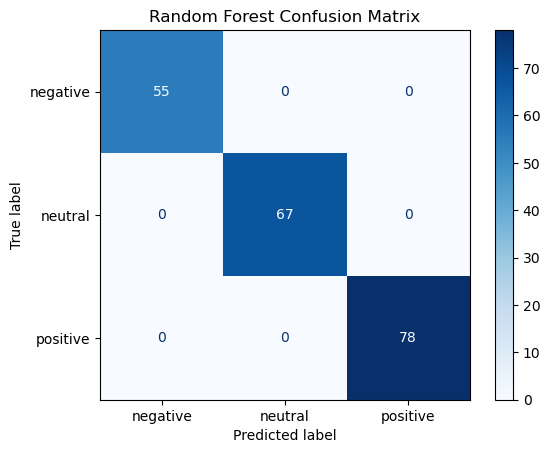

K-Nearest Neighbors Accuracy: 100.00%


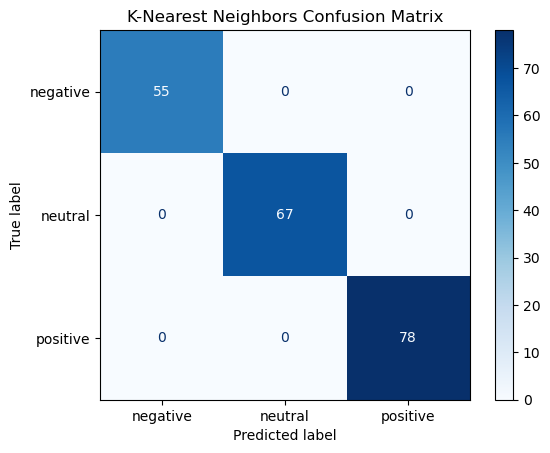

In [61]:
# Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    print(f'{name} Accuracy: {acc:.2f}%')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()